As you can see, the effect is minimal, but the val curve a bit smoother in case of text clean-up

# Why?

We already limit the vocab to the most frequent 10K words, and we use BoW features, so cleanining up the text has minimal effect, since the words context is neglected (high frequent words are likely to always be scored no matter different morphologies might be missed sometimes).

For sequence models for example with word embeddings (as we will see), the context of the word will have strong effect, so the clean up step will have more importance.

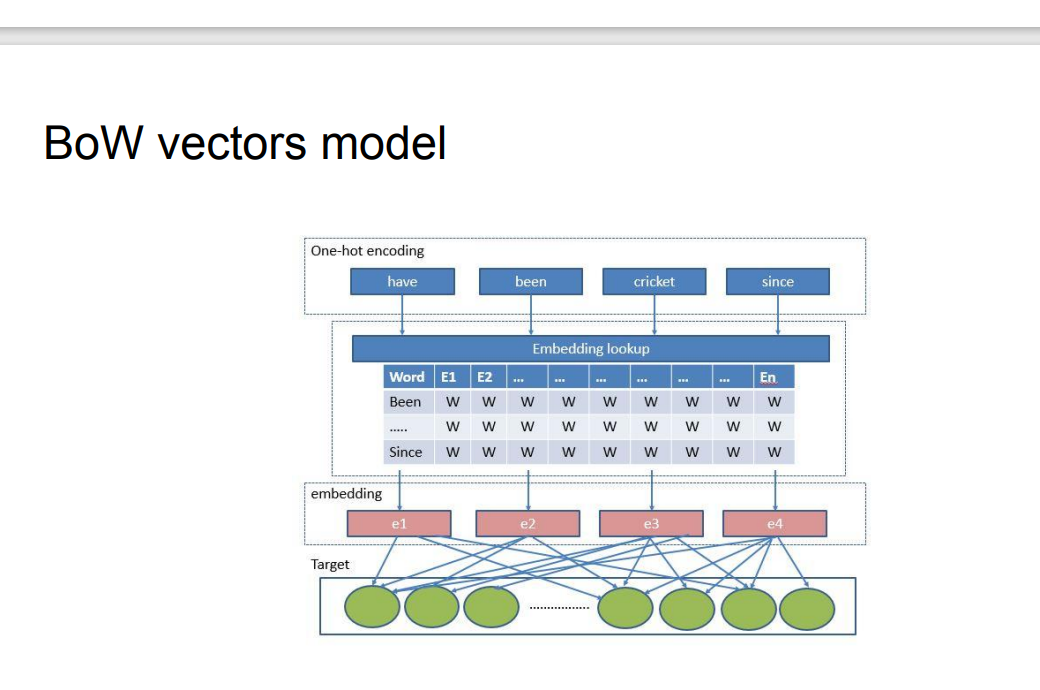

# Bag-of-word Vectors:

Th above model suffers two issues:

1- Sequence info is lost. We will treat that later with sequence models

2- __Sparsity__: the input scalars represent words indices. Those are sparse, and do not include any info about the word (is it a verb, is it a noun, is it a sarcastic word,....etc). Also, this input is very sparse, where in a sentence, we only have few words of the vocab.

Thus, we use `Embedding` layer, that will encode _latent_ factors of the word features. In the current setup, we will _learn_ what those latent features are during training.

## Embedding

The input scalars represent words indices. Those are sparse, and do not include any info about the word (is it a verb, is it a noun, is it a sarcastic word,....etc). Also, this input is very sparse, where in a sentence, we only have few words of the vocab.

Thus, we use `Embedding` layer, that will encode _latent_ factors of the word features. In the current setup, we will _learn_ what those latent features are during training.


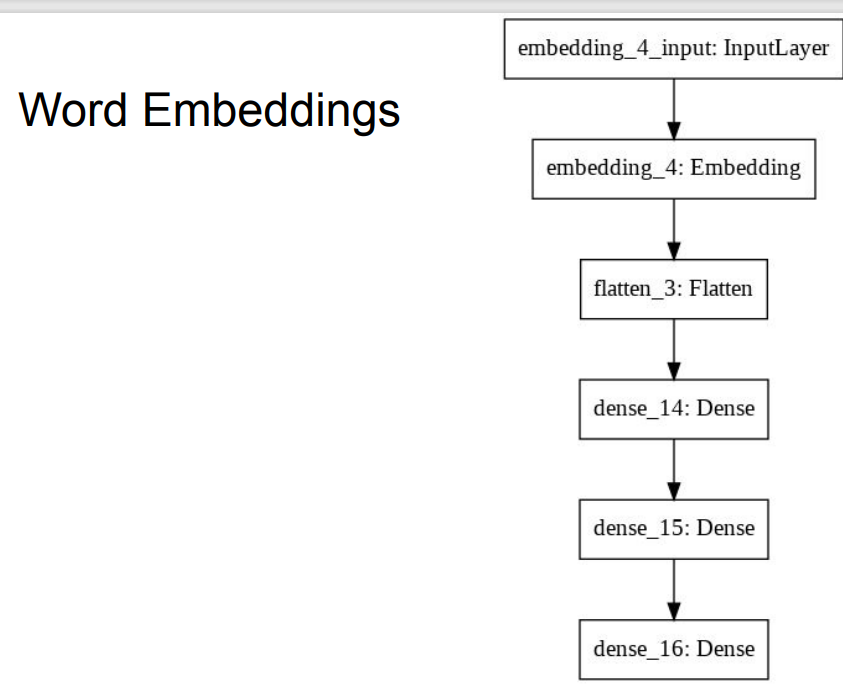

# Word Embedding
A word embedding is a class of approaches for representing words and documents using a
dense vector representation. It is an improvement over more the traditional bag-of-word model
encoding schemes where large sparse vectors were used to represent each word or to score each
word within a vector to represent an entire vocabulary. These representations were sparse
because the vocabularies were vast and a given word or document would be represented by a
large vector comprised mostly of zero values.
Instead, in an embedding, words are represented by dense vectors where a vector represents
the projection of the word into a continuous vector space. The position of a word within the
vector space is learned from text and is based on the words that surround the word when it is
used. The position of a word in the learned vector space is referred to as its embedding. Two
popular examples of methods of learning word embeddings from text include:

- Word2Vec.
- GloVe.
In addition to these carefully designed methods, a word embedding can be learned as part
of a deep learning model. This can be a slower approach, but tailors the model to a speci
c
training dataset.
*


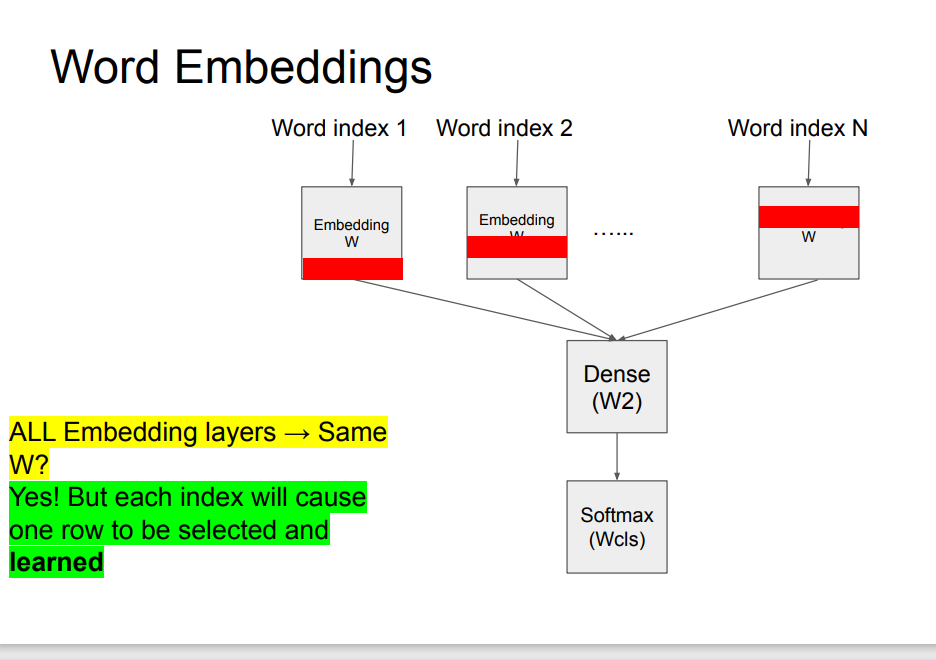

# Keras Embedding Layer
Keras offers an Embedding layer that can be used for neural networks on text data.

You can think of it as:
- LUT
- Weight Matrix: n_vocab x emb_sz

It requires that the input data be integer encoded, so that each word is represented by a unique integer.

This data preparation step can be performed using the Tokenizer API also provided with Keras.


The Embedding layer is initialized with random weights and will learn an embedding for all of the words in the training dataset.

It is a layer that can be used in a variety of ways, such as:

- _From scratch embeddings_ It can be used alone to learn a word embedding that can be saved and used in another model later.

- _Learnable embeddings_ It can be used as part of a deep learning model where the embedding is learned along with the model itself.

- _Pre-trained embeddings_ It can be used to load a pre-trained word embedding model, a type of transfer learning. This can be mixed with learnable embeddings, where those weights are later updated or frozen as part of the larger model.


The Embedding layer is defined as the first hidden layer of a network. It must specify 3 arguments:
- input dim: This is the size of the vocabulary in the text data. For example, if your data is integer encoded to values between 0-10, then the size of the vocabulary would be 11 words.

- output dim: This is the size of the vector space in which words will be embedded. It defines the size of the output vectors from this layer for each word. For example, it could be 32 or 100 or even larger. Test different values for your problem.

-  input length: This is the length of input sequences, as you would de
ne for any input layer of a Keras model. For example, if all of your input documents are comprised of 1000 words, this would be 1000.

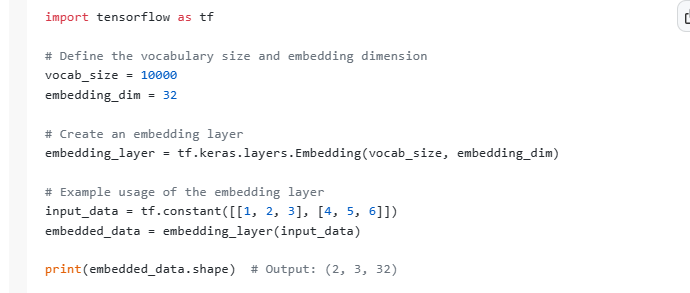

In [1]:
from tensorflow.keras.layers import Embedding
e = Embedding(200 , 32 , input_length = 50)

The Embedding layer has weights that are learned. If you save your model to file, this will include weights for the Embedding layer.

The output of the Embedding layer is a 2D vector with one embedding for each word in the input sequence of words (input document).

If you wish to connect a Dense layer directly to an Embedding layer, you must first flatten the 2D output matrix to a 1D vector using the Flatten layer.

Now, let's see how we can use an Embedding layer in practice.

# Example

* we will look at how we can learn a word embedding while setting a neural network on a text classifiation problem.
*  We will define a small problem where we have 10 text documents, each with a comment about a piece of work a student submitted.

* Each text document is classified as positive 1 or negative 0.
* This is a simple sentiment analysis problem.
* First, we will de
ne the documents and their class labels.

* **pad_sequences is a function in the Keras deep learning library that is used to pad sequences to a specific length.**
* **It is commonly used when working with sequences of variable lengths, such as in natural language processing tasks.**
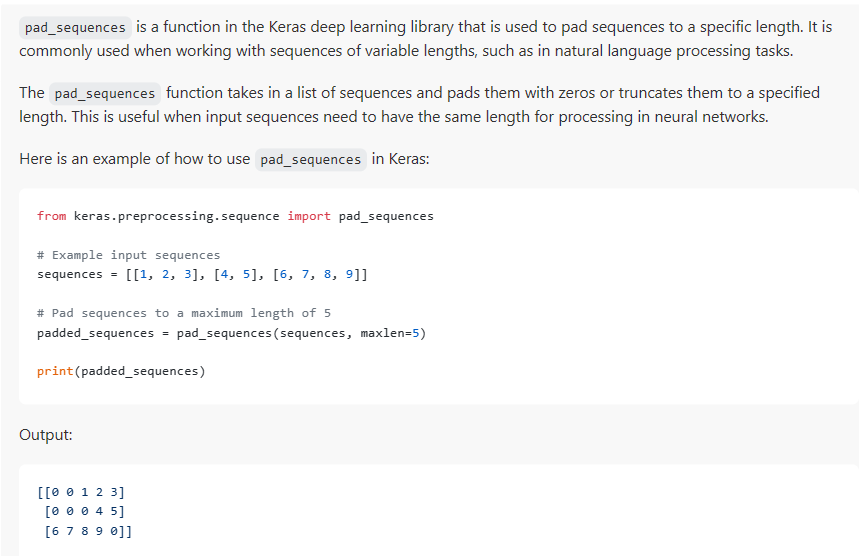

* **A tokenizer is a tool used in natural language processing (NLP) to break text into smaller units called tokens.**
* **These tokens can be words, sentences, or even individual characters, depending on the requirements of the task at hand.**
* **Tokenization is a crucial step in many NLP tasks such as text classification, named entity recognition, and machine translation.**
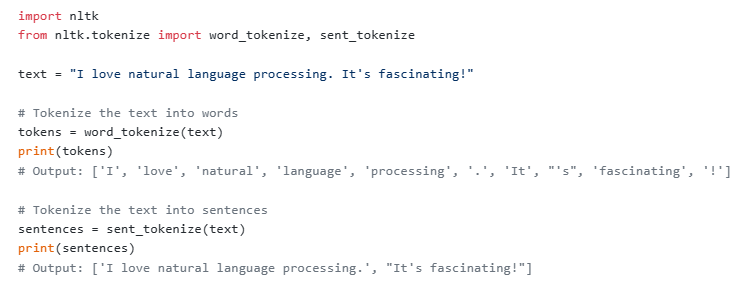

# 1. Imported Libraries are Used in a model

In [2]:
from keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Flatten , Dense , Dropout
from tensorflow.keras.layers import Embedding

# 2. Build a document

## `Padding = 'Post'`

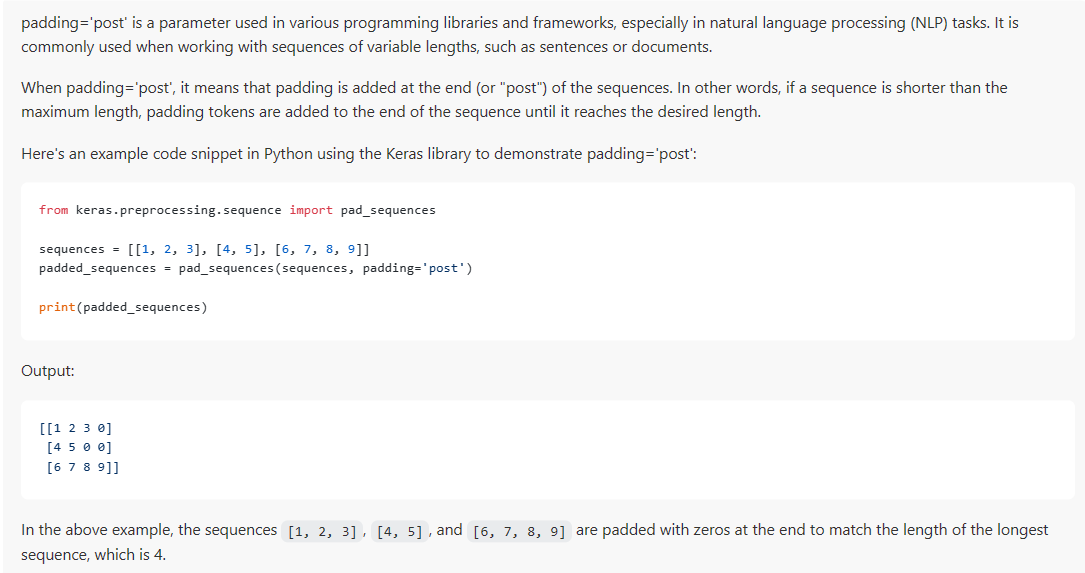

In [3]:
# define documents
docs = ['Well done!','Good work','Great effort','nice work','Excellent!','Weak','Poor effort!','not good','poor work','Could have done better.']
#-----------------------------------------------------------------------
# define class labels
labels = [1,1,1,1,1,0,0,0,0,0]
#-----------------------------------------------------------------------
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(docs)
print('The Tokenizer Is --> ',t)
print('**'*40)
#-------------------------------------------------------------------
vocab_size = len(t.word_index )+ 1
print('The length of vocabulary size depend on length of tokenizer for (word index) Is--> ',vocab_size)
print('**'*40)
#--------------------------------------------------------------------
# integer encode the documents
encode_docs = t.texts_to_sequences(docs)
print('The Encoded Docs For Each Tokens Is Sentence Is --> ',encode_docs)
print('**'*40)
#---------------------------------------------------------------------
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encode_docs ,maxlen=max_length , padding='post')
print('\t\t Padding Docs For Max_Length = 4 \n',padded_docs)
print('**'*40)

The Tokenizer Is -->  <keras_preprocessing.text.Tokenizer object at 0x000001D5C9FF2230>
********************************************************************************
The length of vocabulary size depend on length of tokenizer for (word index) Is-->  15
********************************************************************************
The Encoded Docs For Each Tokens Is Sentence Is -->  [[6, 2], [3, 1], [7, 4], [8, 1], [9], [10], [5, 4], [11, 3], [5, 1], [12, 13, 2, 14]]
********************************************************************************
		 Padding Docs For Max_Length = 4 
 [[ 6  2  0  0]
 [ 3  1  0  0]
 [ 7  4  0  0]
 [ 8  1  0  0]
 [ 9  0  0  0]
 [10  0  0  0]
 [ 5  4  0  0]
 [11  3  0  0]
 [ 5  1  0  0]
 [12 13  2 14]]
********************************************************************************


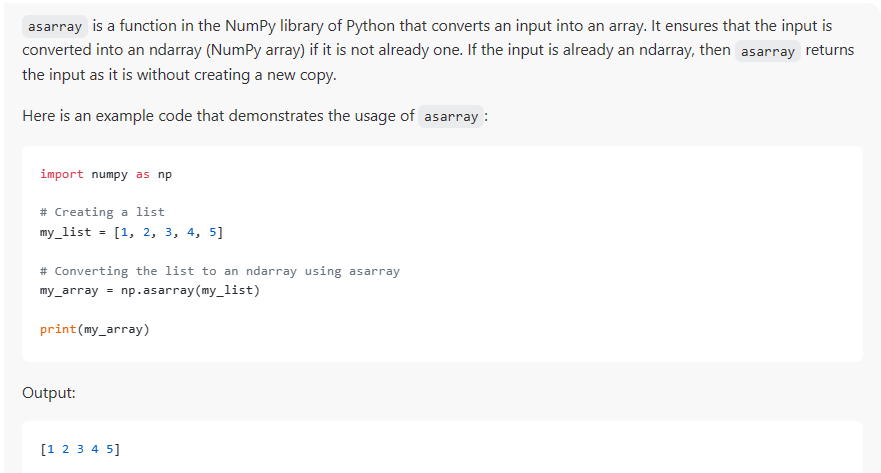

In [4]:
## load the whole embedding into memory
import numpy as np
embedding_index = dict() # Create Emprt Dictionary
#Open File
f = open('glove.6B.100d.txt', mode='rt', encoding='utf-8')
#Create for loop because read for each word / tokens in file and make splitting
for line in f : # F --> File
    values = line.split()#Vaues Conatin Splitting For Line
    word = values[0] # Word --> Is strat from index 0 / token 0
    coefs = np.asarray(values[1:] , dtype = 'float32')
    embedding_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embedding_index))

Loaded 400000 word vectors.


In [10]:
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 100)) # Create Emabedding Matrix Conatin (rows = vocabulary size) & (columns / features / latent_factors = 100)
for word, i in t.word_index.items():
  embedding_vector = embedding_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [11]:
# define model
model = Sequential()
e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=4, trainable=False)
model.add(e)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# summarize the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 4, 100)            1500      
                                                                 
 flatten_3 (Flatten)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 401       
                                                                 
Total params: 1,901
Trainable params: 401
Non-trainable params: 1,500
_________________________________________________________________


In [12]:
# fit the model
model.fit(padded_docs , labels , epochs = 50 , verbose = 0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

ValueError: Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, (<class 'list'> containing values of types {"<class 'int'>"})

In [6]:
emb_sz = 50
n_latent_factors = min(n_categories//2, emb_sz)
model = models.Sequential()
model.add(layers.Embedding(vocab_sz+1, n_latent_factors, input_length=vocab_sz))
model.add(layers.Flatten())
model.add(layers.Dense(emb_sz, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
plot_model(model)


NameError: name 'n_categories' is not defined